In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir

228827136/228813984 [==============================] - 3s 0us/step


'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
img_count = len(list(data_dir.glob('*/*.jpg')))

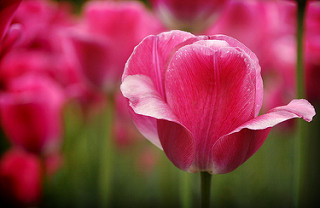

In [ ]:
roses = list(data_dir.glob('roses/*'))
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(272, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)         

Epoch 1/20
86/86 [==============================] - 2s 23ms/step - loss: 1.4246 - accuracy: 0.3772
Epoch 2/20
86/86 [==============================] - 2s 23ms/step - loss: 1.0571 - accuracy: 0.5807
Epoch 3/20
86/86 [==============================] - 2s 22ms/step - loss: 0.8682 - accuracy: 0.6635
Epoch 4/20
86/86 [==============================] - 2s 22ms/step - loss: 0.7222 - accuracy: 0.7264
Epoch 5/20
86/86 [==============================] - 2s 22ms/step - loss: 0.5638 - accuracy: 0.7900
Epoch 6/20
86/86 [==============================] - 2s 22ms/step - loss: 0.3884 - accuracy: 0.8637
Epoch 7/20
86/86 [==============================] - 2s 22ms/step - loss: 0.2104 - accuracy: 0.9302
Epoch 8/20
86/86 [==============================] - 2s 22ms/step - loss: 0.1278 - accuracy: 0.9604
Epoch 9/20
86/86 [==============================] - 2s 23ms/step - loss: 0.0791 - accuracy: 0.9815
Epoch 10/20
86/86 [==============================] - 2s 22ms/step - loss: 0.0423 - accuracy: 0.9935
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled , y_test)

29/29 [==============================] - 1s 18ms/step - loss: 2.8596 - accuracy: 0.6514


[2.859588861465454, 0.6514161229133606]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[  3.0789318,   8.424068 ,  17.154648 , -19.03558  ,  -4.150998 ],
       [ 10.414601 ,  -6.318565 ,  18.788166 ,  -6.664962 , -12.855561 ],
       [  6.4713473,   7.321625 ,  14.058524 , -11.762721 , -11.352316 ],
       ...,
       [ -1.1824528, -21.474537 ,  -2.772426 ,  16.290754 ,   9.004088 ],
       [ 15.063626 ,   8.745497 ,   9.2273245, -17.717484 ,  18.466936 ],
       [-15.138315 , -26.214306 ,   1.3910145,  16.524315 ,  -0.882983 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

2

In [ ]:
y_test[0]

1

Data Augmentation to improve test accuracy


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

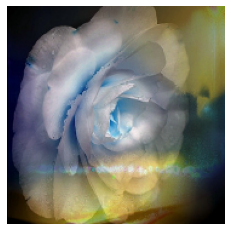

In [ ]:
plt.axis('off')
plt.imshow(X[0])

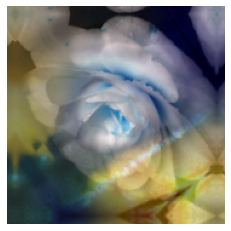

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)    

Epoch 1/40
86/86 [==============================] - 3s 25ms/step - loss: 1.5597 - accuracy: 0.3543
Epoch 2/40
86/86 [==============================] - 2s 24ms/step - loss: 1.1406 - accuracy: 0.5360
Epoch 3/40
86/86 [==============================] - 2s 24ms/step - loss: 1.0263 - accuracy: 0.5934
Epoch 4/40
86/86 [==============================] - 2s 24ms/step - loss: 0.9371 - accuracy: 0.6359
Epoch 5/40
86/86 [==============================] - 2s 24ms/step - loss: 0.9042 - accuracy: 0.6504
Epoch 6/40
86/86 [==============================] - 2s 24ms/step - loss: 0.8271 - accuracy: 0.6875
Epoch 7/40
86/86 [==============================] - 2s 25ms/step - loss: 0.7943 - accuracy: 0.6988
Epoch 8/40
86/86 [==============================] - 2s 25ms/step - loss: 0.7505 - accuracy: 0.7039
Epoch 9/40
86/86 [==============================] - 2s 25ms/step - loss: 0.7322 - accuracy: 0.7191
Epoch 10/40
86/86 [==============================] - 2s 24ms/step - loss: 0.7097 - accuracy: 0.7318
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 1.0724 - accuracy: 0.7266


[1.0723613500595093, 0.7265795469284058]